In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings


# Reading Data

In [7]:
train = pd.read_csv('datasets/train_data.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test = pd.read_csv('datasets/test_data.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
#make copy of the original data 

train_original=train.copy()
test_original=test.copy()

# Understanding the datasets

In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
train.shape

(614, 13)

In [18]:
test.shape

(367, 12)

In [22]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

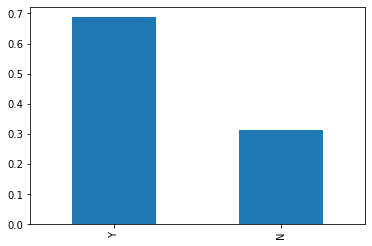

In [27]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

 
The loan of 422(around 69%) people out of 614 were approved.


---
### Independent Variable (Categorical)

These features have categories. 
1. Gender 
2. Married
3. Self_Employed
4. Credit_History

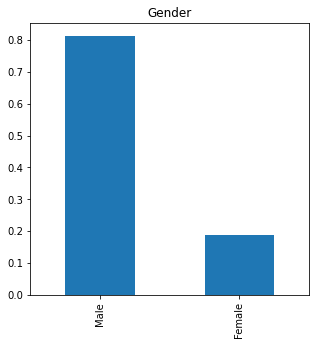

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [46]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Gender')
plt.show()
train['Gender'].value_counts(normalize=True)


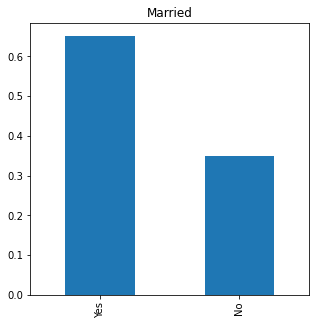

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [47]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Married')
plt.show()
train['Married'].value_counts(normalize=True)

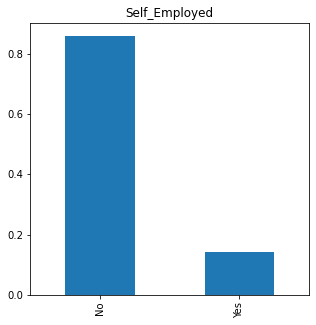

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [48]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Self_Employed')
plt.show()
train['Self_Employed'].value_counts(normalize=True)

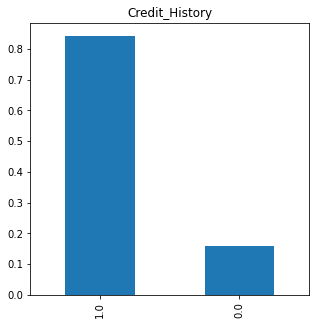

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [49]:
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Credit_History')
plt.show()
train['Credit_History'].value_counts(normalize=True)


It can be inferred from the above bar plots that:
- 80% of applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% of applicants in the dataset are self-employed.
- Around 85% of applicants have repaid their doubts.
---

### Independent Variable (Ordinal)

These features have categories. 
1. Dependents 
2. Education
3. Property_Area